In [56]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [57]:
#load train dataset 
df=pd.read_csv(r"D:\Data Science\course_ML_mostafa_saad\projects\2 Credit Card Fraud Detection\data\split\train.csv")
#load val dataset
df_val=pd.read_csv(r"D:\Data Science\course_ML_mostafa_saad\projects\2 Credit Card Fraud Detection\data\split\val.csv")
#check
df.sample(10)



,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
62323,141795.0,-2.208719,-0.668035,-0.461423,-0.308953,1.282194,-1.241089,0.209025,0.585629,-0.061194,...,0.038849,-0.569782,0.019844,-0.549747,0.158114,-0.079326,0.207143,-0.098502,127.48,0
128153,52472.0,-4.031685,3.452323,-0.273959,-2.670480,-0.020999,-0.274908,0.938249,-0.319565,3.805947,...,-0.936910,-0.518201,-0.156727,-0.882964,0.527186,0.602573,-0.006617,-1.175537,1.46,0
117698,66603.0,-2.679675,0.768986,1.761372,4.682727,-0.755284,1.272277,-0.532671,1.064865,-1.946572,...,0.131726,0.796677,0.586847,0.059116,0.342311,0.508832,-0.175063,0.200877,108.83,0
49411,117353.0,0.125879,0.643831,-1.399580,-0.214397,1.234900,-0.849168,2.234600,-0.644844,-0.447181,...,0.218581,0.685312,0.143946,0.530649,-0.681349,0.529719,-0.037128,0.051973,154.64,0
139294,120830.0,1.426163,-1.621093,-1.611025,-0.313693,1.219779,4.169444,-1.156364,1.079965,1.145560,...,0.215518,0.049801,0.105601,0.727822,-0.595458,0.182588,-0.020735,0.007477,278.85,0
47892,117026.0,-0.721755,-0.002669,-1.574083,-0.004298,-0.612637,-0.111871,2.037562,0.150431,-0.679693,...,0.636380,1.054702,0.833303,-0.534807,-0.156882,-0.159892,-0.153549,0.056276,441.00,0
52527,170894.0,0.013261,0.797229,0.174222,-0.785140,0.656237,-0.525104,0.894903,-0.016296,-0.289785,...,-0.223286,-0.492501,0.025974,-0.401460,-0.488649,0.146147,0.245905,0.083537,4.47,0
149047,76854.0,1.020539,-0.038704,0.459542,1.529911,-0.442151,-0.370963,0.106118,-0.009777,0.379293,...,-0.051395,-0.091853,-0.067849,0.390152,0.570027,-0.336476,0.023526,0.028409,70.75,0
165365,128357.0,-0.286464,1.122190,-0.889709,-0.668293,0.834948,-0.332522,0.496029,0.511414,-0.449579,...,-0.249317,-0.774365,0.135866,0.184596,-0.400897,0.119562,0.092845,-0.001105,14.99,0
123621,160235.0,-1.583799,1.762232,1.201420,1.094254,-0.649641,0.067473,-0.085035,1.027556,-0.098990,...,-0.514163,-1.309412,-0.053749,-0.089961,0.473298,-0.769564,0.229475,0.067807,15.90,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170884 entries, 0 to 170883
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    170884 non-null  float64
 1   V1      170884 non-null  float64
 2   V2      170884 non-null  float64
 3   V3      170884 non-null  float64
 4   V4      170884 non-null  float64
 5   V5      170884 non-null  float64
 6   V6      170884 non-null  float64
 7   V7      170884 non-null  float64
 8   V8      170884 non-null  float64
 9   V9      170884 non-null  float64
 10  V10     170884 non-null  float64
 11  V11     170884 non-null  float64
 12  V12     170884 non-null  float64
 13  V13     170884 non-null  float64
 14  V14     170884 non-null  float64
 15  V15     170884 non-null  float64
 16  V16     170884 non-null  float64
 17  V17     170884 non-null  float64
 18  V18     170884 non-null  float64
 19  V19     170884 non-null  float64
 20  V20     170884 non-null  float64
 21  V21     17

In [4]:
df.isna().sum().any()

False

In [5]:
df.duplicated().sum().any()

True

In [6]:
df[df.duplicated()==True]['Class'].value_counts()

0    440
1      8
Name: Class, dtype: int64

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.duplicated().sum().any()

False

In [9]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,170436.000000,170436.000000,170436.000000,170436.000000,170436.000000,170436.000000,170436.000000,170436.000000,170436.000000,170436.000000,...,170436.000000,170436.000000,170436.000000,170436.000000,170436.000000,170436.000000,170436.000000,170436.000000,170436.000000,170436.000000
mean,94964.883252,0.003016,-0.003764,-0.001770,-0.004885,0.001359,-0.000109,0.000715,-0.002095,-0.001676,...,0.000341,-0.000016,0.000579,-0.000780,-0.000788,-0.000671,0.001634,0.000775,88.596637,0.001743
std,47458.729255,1.951034,1.646755,1.516106,1.415351,1.391759,1.337909,1.251332,1.191566,1.096377,...,0.730435,0.725241,0.620362,0.605168,0.521052,0.481640,0.398607,0.313420,256.942683,0.041708
min,0.000000,-46.855047,-63.344698,-48.325589,-5.683171,-113.743307,-23.496714,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-36.666000,-2.836627,-7.081325,-2.604551,-9.895244,-15.430084,0.000000,0.000000
25%,54355.000000,-0.919288,-0.600188,-0.896354,-0.850234,-0.690660,-0.769441,-0.553610,-0.209678,-0.642834,...,-0.228009,-0.543061,-0.160869,-0.354463,-0.318465,-0.327476,-0.070596,-0.052949,5.640000,0.000000
50%,84923.500000,0.018437,0.064566,0.177007,-0.022444,-0.053562,-0.274847,0.040934,0.021147,-0.052595,...,-0.029584,0.006095,-0.010625,0.040433,0.016671,-0.051336,0.001601,0.011229,22.080000,0.000000
75%,139388.000000,1.316771,0.799875,1.028136,0.735256,0.612154,0.399075,0.569308,0.325010,0.594459,...,0.186473,0.528623,0.147974,0.437967,0.350126,0.240168,0.091825,0.078454,77.822500,0.000000
max,172792.000000,2.451888,22.057729,4.226108,16.875344,34.099309,73.301626,120.589494,18.282168,10.392889,...,27.202839,10.503090,22.528412,4.584549,6.070850,3.517346,31.612198,16.129609,25691.160000,1.000000


## Analysis 

### target column

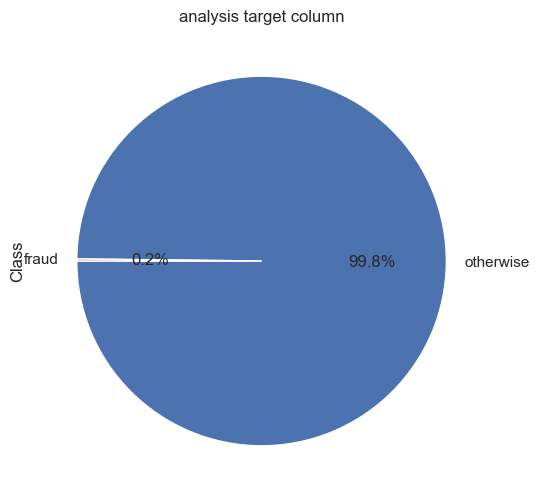

In [125]:
target=df['Class'].value_counts()
target.plot(kind='pie',subplots=True, figsize=(11, 6),autopct='%1.1f%%',startangle=180,labels=['otherwise', 'fraud'])
plt.title('analysis target column')


plt.show()

Obviously, about 98 percent of the data belongs to class 0 (not frauds  transactions)

We need to deal with imbalanced data through some well-known techniques and selection Appropriate technique  

<strong>there are some technique to deal with impalance dataset</strong><br>
<ul>
<li>Resampling (Oversampling and Undersampling)</li>
<li>SMOTE</li>
<li>Weights</li>


</ul>


### Amount column

In [15]:
df['Amount'].describe()

count    170884.000000
mean         88.511723
std         256.737144
min           0.000000
25%           5.637500
50%          22.020000
75%          77.650000
max       25691.160000
Name: Amount, dtype: float64

In [16]:
x=df['Amount'].quantile(0.99)
x

1025.6485000000007

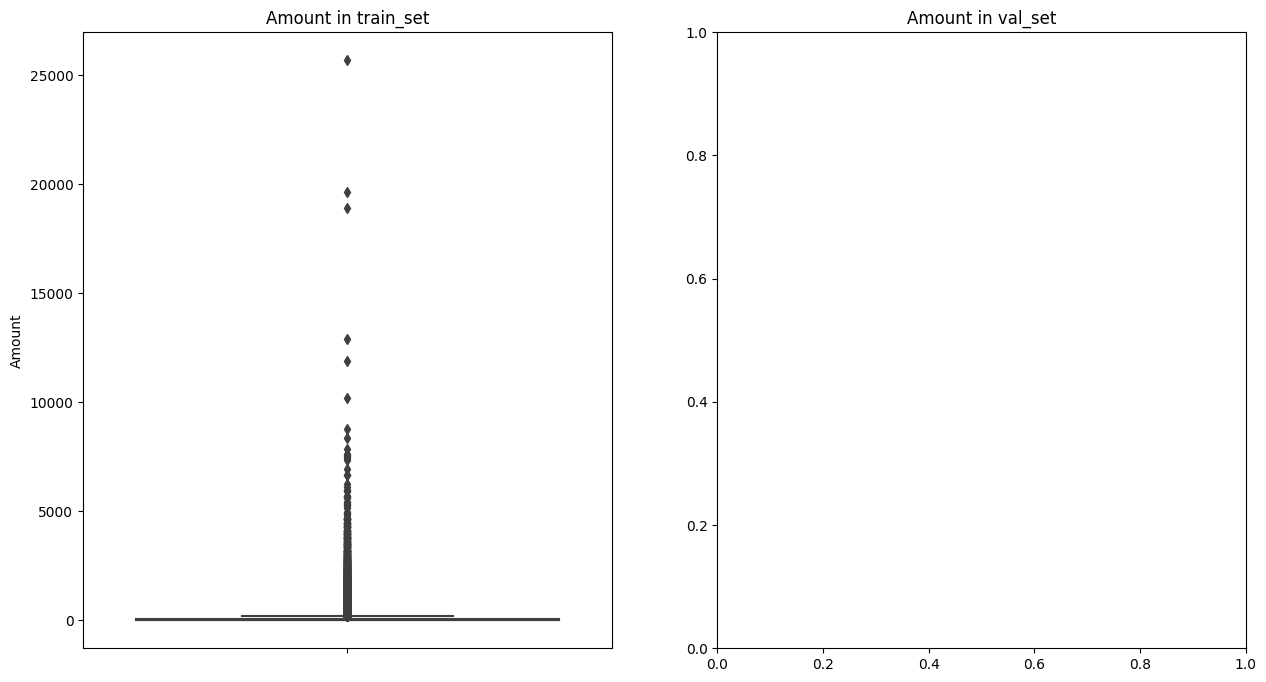

In [26]:
fig,ax=plt.subplots(1,2,figsize=(15, 8))
sns.boxplot(data=df,y='Amount',ax=ax[0])
ax[0].set_title('Amount in train_set')
sns.boxplot(data=df_val,y='Amount',ax=px[1])
ax[1].set_title('Amount in val_set')
plt.show()

#### train and val have same distribution 
#### alot of outliers in Amount feature 


In [40]:
q1=df['Amount'].quantile(0.25)
q3=df['Amount'].quantile(0.75)
iqr=q3-q1
x=(q3+(1.5 *iqr)) 
y=(q1-(1.5 *iqr))
df_remove_outliers=df[(df['Amount']<=x) & (df['Amount']>=y)]
df_remove_outliers.shape
df.shape[0]-df_remove_outliers.shape[0]

(151978, 31)

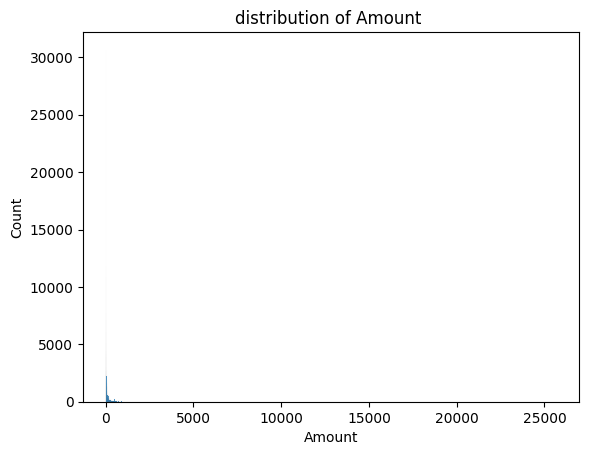

In [116]:

sns.histplot(data=df,x='Amount')
plt.title('distribution of Amount ')
plt.show()

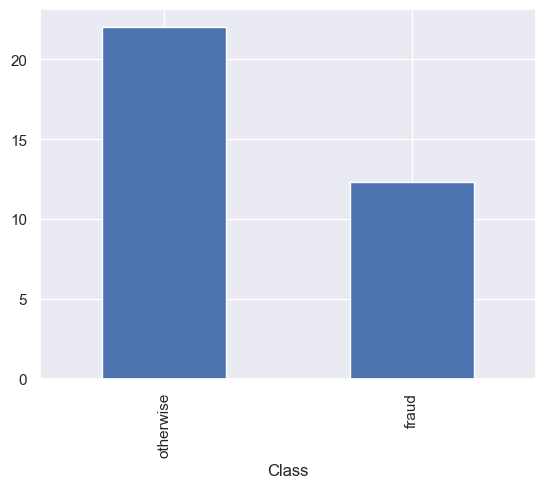

In [127]:
Amount_Class=df.groupby('Class')["Amount"].median()
Amount_Class.plot(kind='bar')
plt.gca().set_xticklabels(['otherwise', 'fraud'])

plt.show()

#### From this scene, it can be concluded that there are many outliers, but getting rid of them is not the best solution. Rather, it is possible to obtain some event through them to help the model predict. Let us discover that.

In [118]:
q9=df['Amount'].quantile(0.9)
df['huge_amount']=df['Amount']>=q9
q1=df['Amount'].quantile(0.1)
df['small_amount']=df['Amount']<=q1


<Axes: >

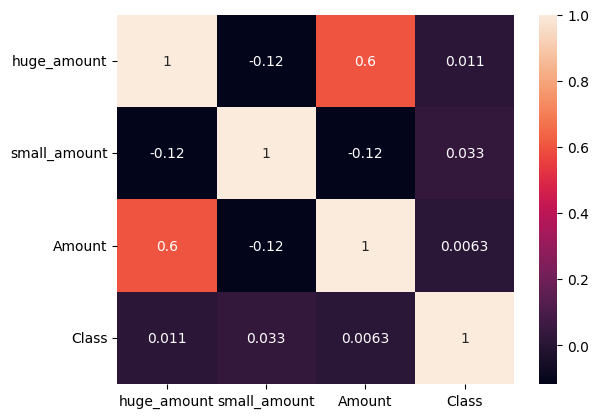

In [119]:
sns.heatmap(df[['huge_amount','small_amount','Amount','Class']].corr(),annot=True)

In [120]:
## Time column

In [121]:
df['Time'].describe()

count    170436.000000
mean      94964.883252
std       47458.729255
min           0.000000
25%       54355.000000
50%       84923.500000
75%      139388.000000
max      172792.000000
Name: Time, dtype: float64

In [58]:
#convert from second to hour 
df['Time']=df['Time']/3600
df_val['Time']=df_val['Time']/3600

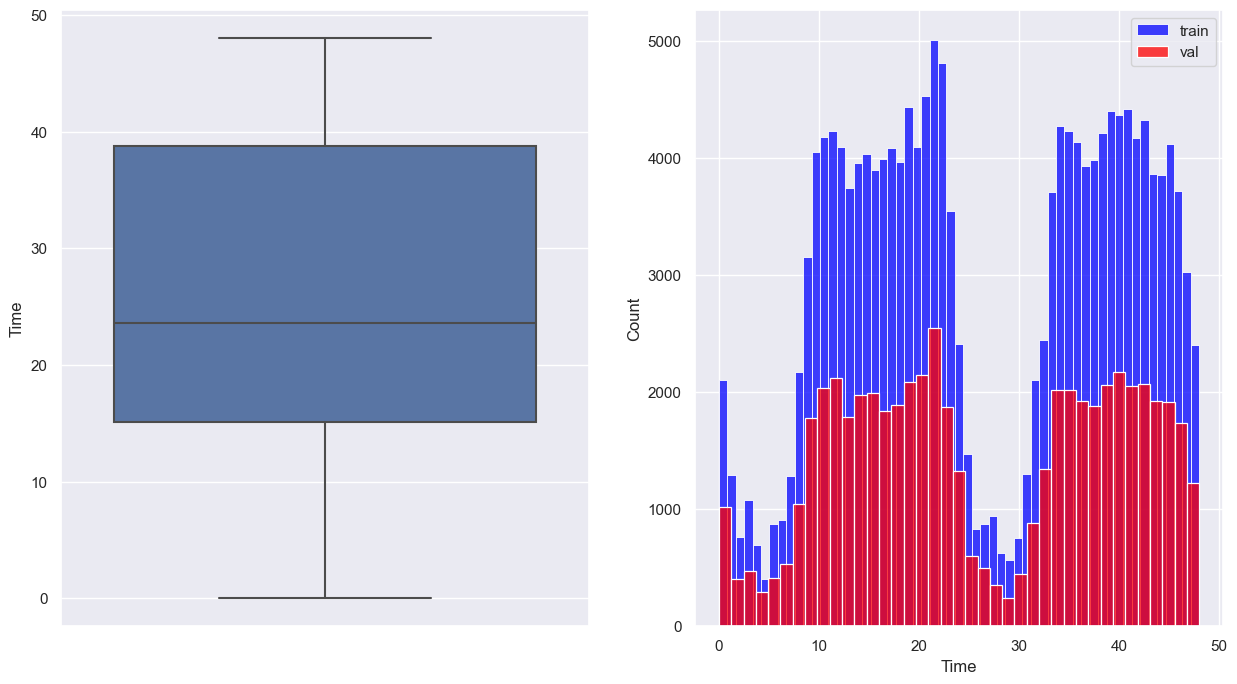

In [60]:

fig,px=plt.subplots(1,2,figsize=(15, 8))
sns.boxplot(y='Time', data=df,ax=px[0])
sns.set(style="darkgrid")
sns.histplot(x='Time', data=df,ax=px[1],color='blue',label='train')
sns.histplot(x='Time', data=df_val,ax=px[1],color='red',label='val')


plt.legend() 
plt.show()


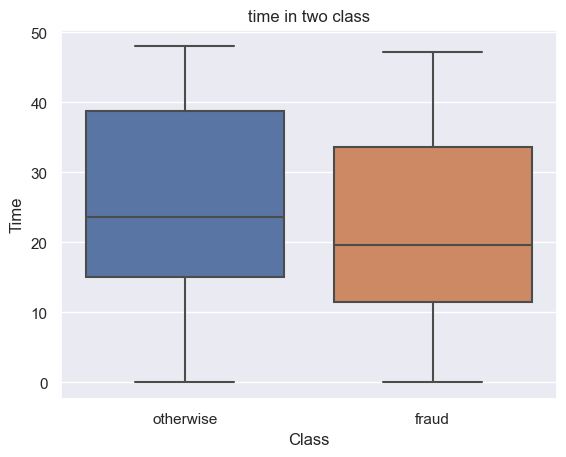

In [129]:
sns.boxplot(x='Class', y='Time', data=df)
plt.gca().set_xticklabels(['otherwise', 'fraud'])
plt.title('time in two class')
plt.show()

#### Number of seconds elapsed between transactions in  class 0 geater than class 1

### Analysis other column from V1 to V28

### show distribution of features

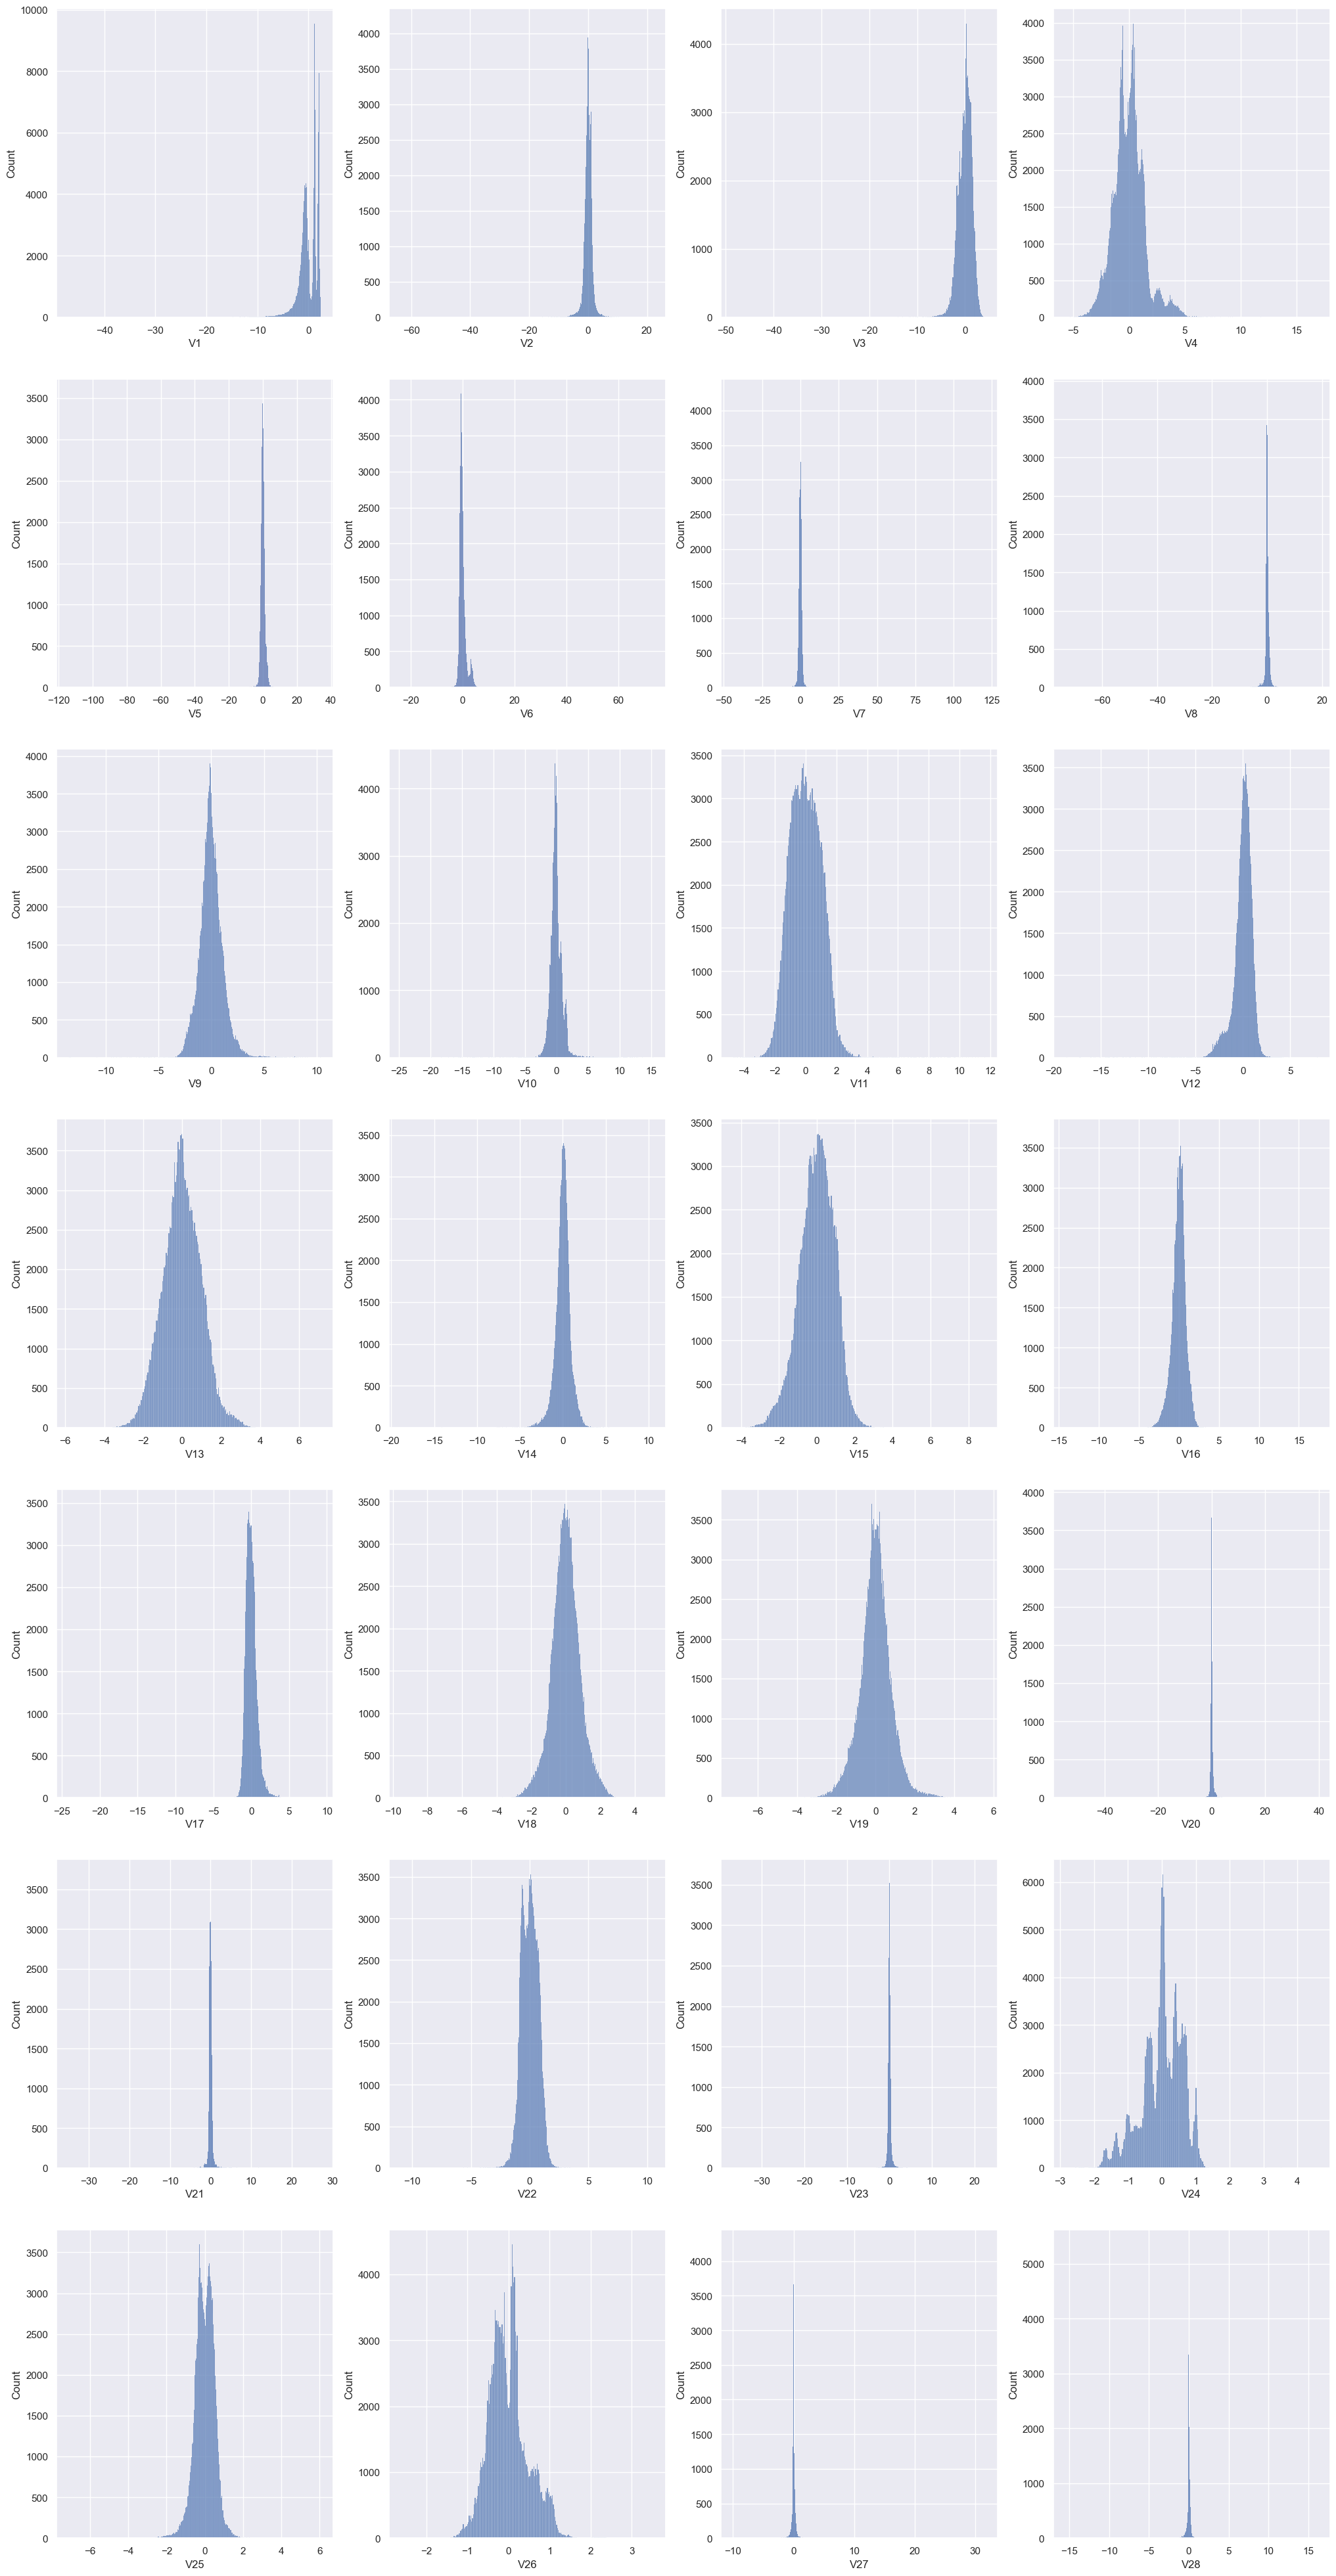

In [88]:
fig,px=plt.subplots(7,4,figsize=(25, 50))
v=[f'V{i}' for i in range(1,29)]
q=0
for i in range(7):
    for j in range(4):
        sns.histplot(x=f'{v[q]}', data=df,ax=px[i,j])
        q+=1

#### show skew of features 

In [95]:
df[v].skew(axis = 1, skipna = True).values
skewness=pd.DataFrame({'features':keys,'skew values':values})
skewness.sort_values(by='skew values',ascending=False).style.background_gradient()

,features,skew values
11,V11,0.157195
4,V4,0.134810
2,V2,0.092926
21,V21,0.046002
19,V19,0.035606
20,V20,0.020050
27,V27,0.014546
28,V28,0.011208
8,V8,0.010040
29,Amount,0.006298


V17,V14 and V12 have high negative skew (less than -0.25)

### detect outliers in features


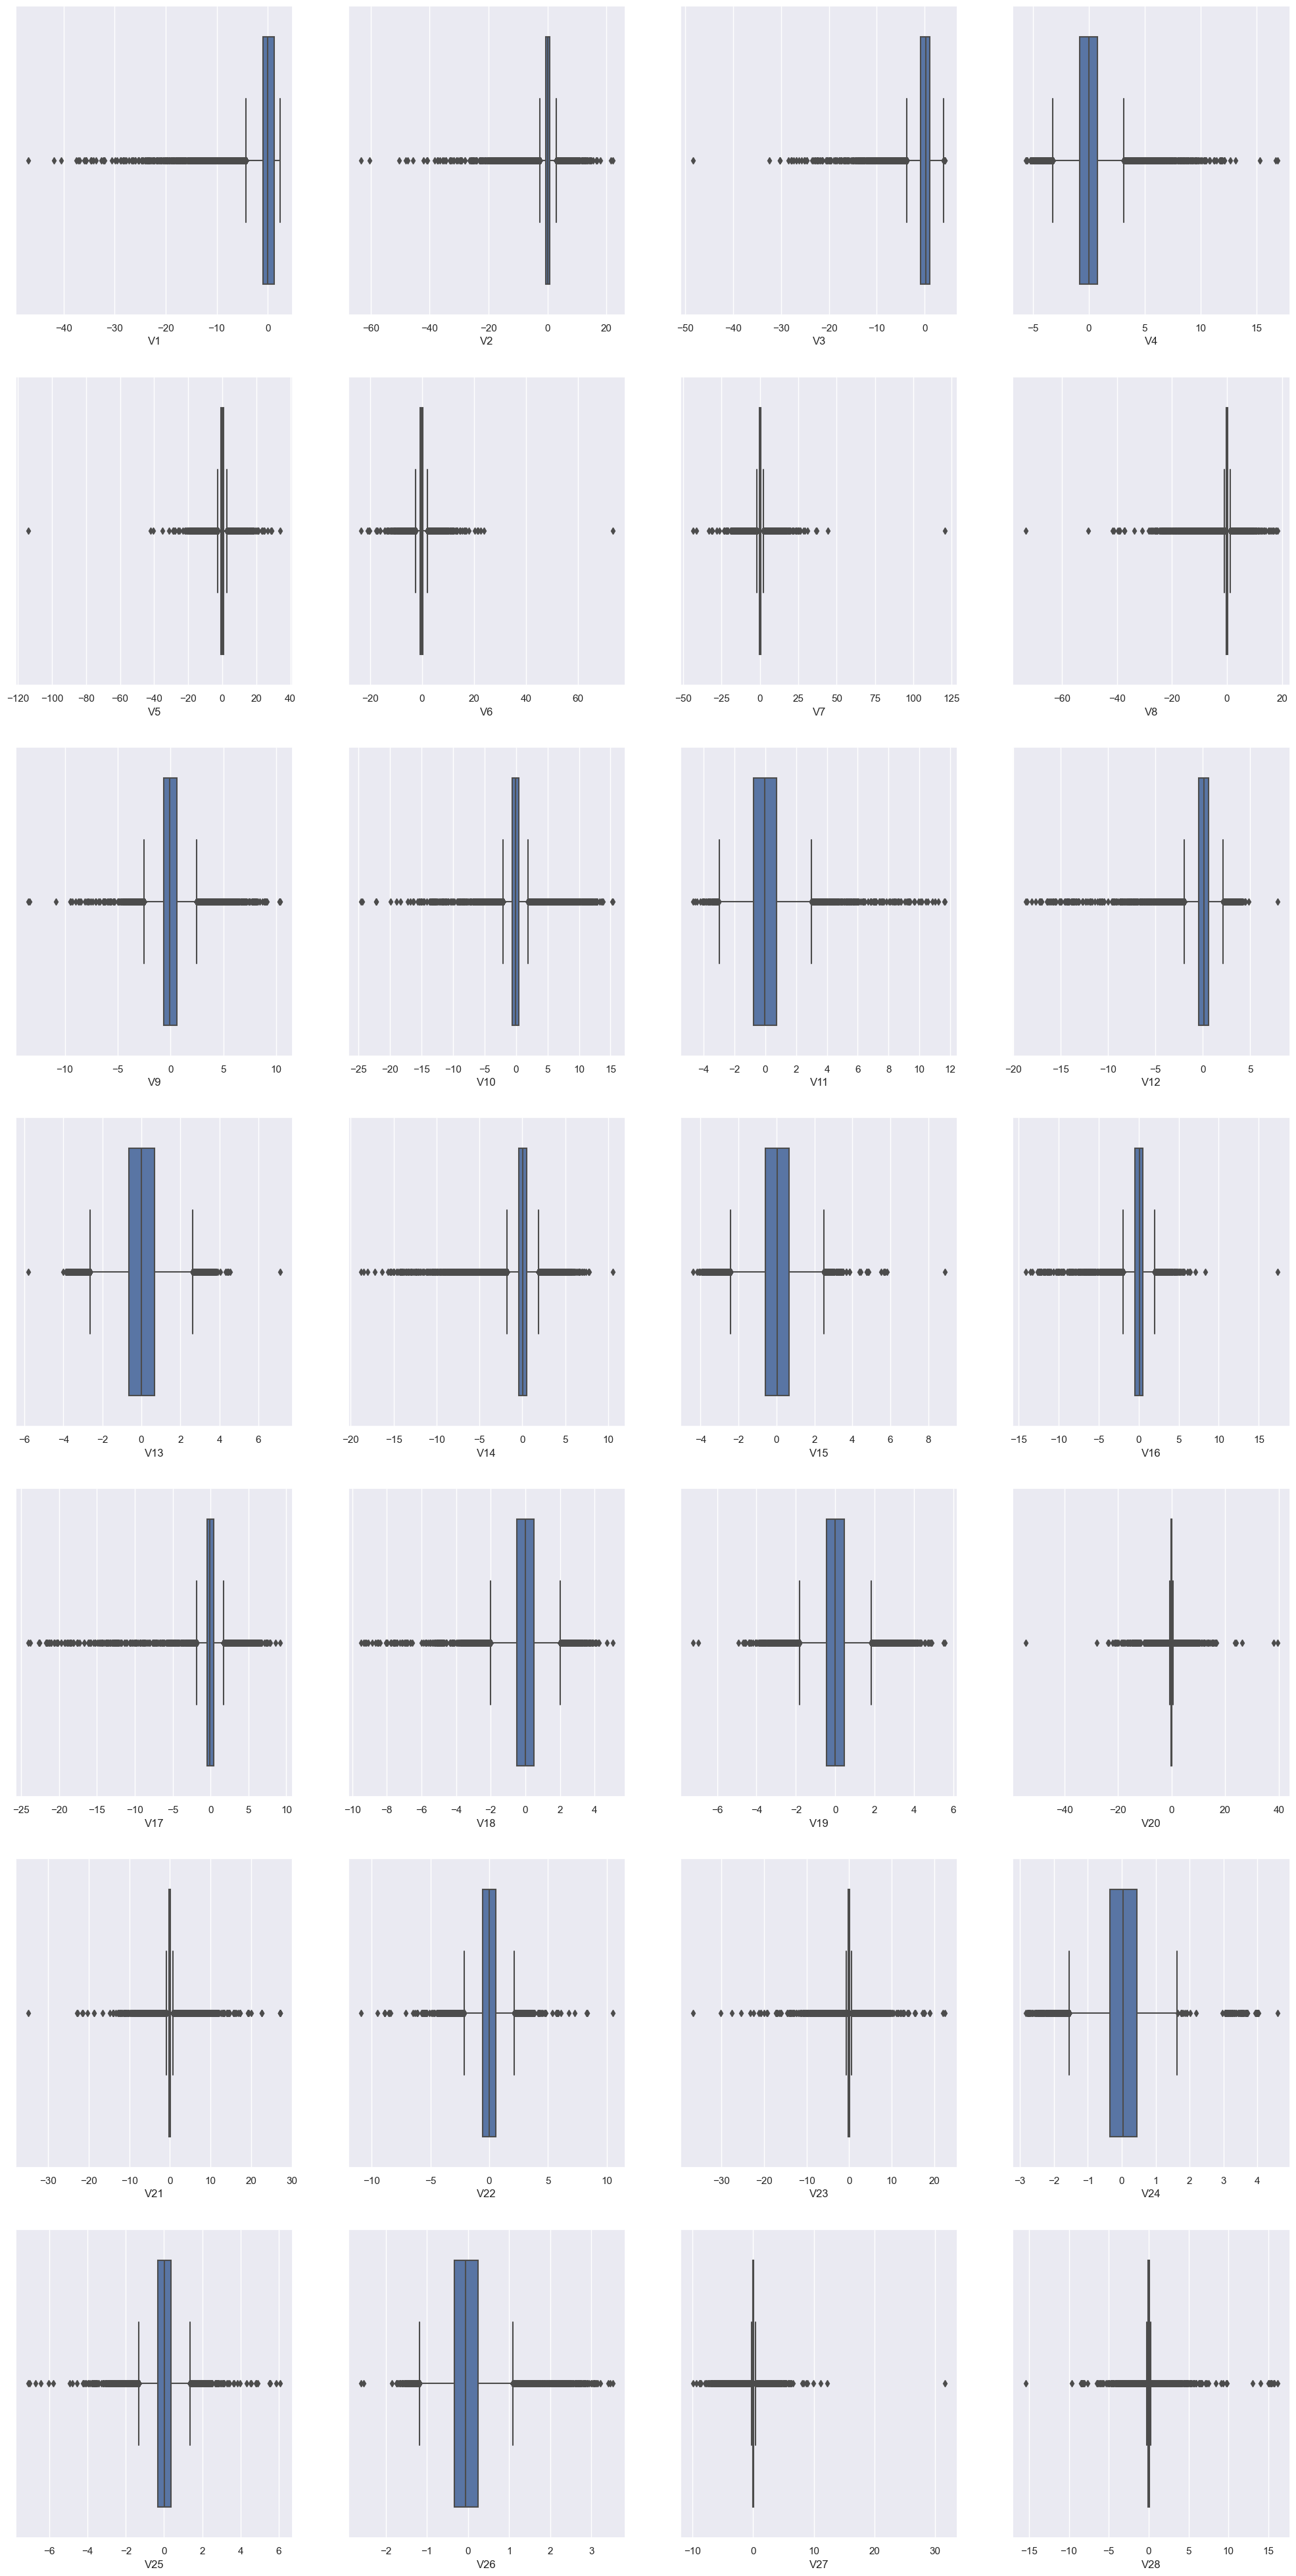

In [97]:
fig,px=plt.subplots(7,4,figsize=(25, 50))
v=[f'V{i}' for i in range(1,29)]
q=0
for i in range(7):
    for j in range(4):
        sns.boxplot(x=f'{v[q]}', data=df,ax=px[i,j])
        q+=1

features have large number of outliers you can drop it or not but let try to show data after drop it and after it well be decide if drop it or not

In [110]:
df_remove_outliers=df
for i in v:
    q1=df_remove_outliers[f'{i}'].quantile(0.25)
    q3=df_remove_outliers[f'{i}'].quantile(0.75)
    iqr=q3-q1
    x=(q3+(1.5 *iqr)) 
    y=(q1-(1.5 *iqr))
    df_remove_outliers=df_remove_outliers[(df_remove_outliers[f'{i}']<=x) & (df_remove_outliers[f'{i}']>=y)]
print('number of rows after befor outliers',df.shape)
print('number of rows after remove outliers',df_remove_outliers.shape)
print('number of rows are removed',df.shape[0]-df_remove_outliers.shape[0])
print('we lost' ,"%.2f" %((df_remove_outliers.shape[0]/df.shape[0])*100),r'% from data')

print('number of rows in class 0 after remove outliers',df_remove_outliers['Class'].value_counts()[0])
print('number of rows in class 1 after remove outliers',df_remove_outliers['Class'].value_counts()[1])





number of rows after befor outliers (170884, 31)
number of rows after remove outliers (72284, 31)
number of rows are removed 98600
we lost 42.30 % from data
number of rows in class 0 after remove outliers 72275
number of rows in class 1 after remove outliers 9


### let's show most important feature 

In [119]:
#correlation 
keys=df.drop("Class", axis=1).apply(lambda x: x.corr(df.Class)).keys()
values=df.drop("Class", axis=1).apply(lambda x: x.corr(df.Class)).values
corr=pd.DataFrame({'features':keys,'correlation values':values})
corr['correlation values']=np.absolute(corr['correlation values'])
corr=corr.sort_values(by='correlation values',ascending=False)
corr.style.background_gradient()

,features,correlation values
17,V17,0.332748
14,V14,0.304561
12,V12,0.264762
10,V10,0.222326
16,V16,0.200487
7,V7,0.194594
3,V3,0.194347
11,V11,0.157195
4,V4,0.134810
18,V18,0.115688


Text(0.5, 1.0, 'most imortant features')

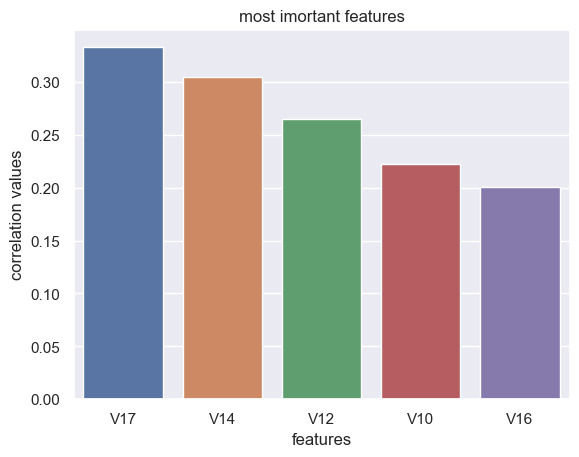

In [121]:
most_imortant_feature=corr.iloc[:5,:]
sns.barplot(data=most_imortant_feature,x='features',y='correlation values')
plt.title('most imortant features')